# Lasso Regression

## Overview
Lasso Regression (**Least Absolute Shrinkage and Selection Operator**) is a **regularized linear regression** technique that adds an **L1 penalty** to the loss function to prevent overfitting and perform automatic **feature selection**.

---

## Loss Function

The Lasso Regression loss function is:

$$J(b) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \|w\|_1$$

Where:
- $J(b)$ — Cost function
- $y_i$ — Actual values
- $\hat{y}_i$ — Predicted values
- $\lambda$ — Regularization parameter (alpha)
- $\|w\|_1 = \sum_{j=1}^{p} |b_j|$ — L1 norm of the weight vector

The intercept (bias term $b_0$) is **not penalized** — only slope coefficients are shrunk.

---

## Closed-Form Solution

Lasso does **not have a closed-form solution** due to the non-differentiability of the absolute value at zero. It is solved iteratively using:
- **Coordinate Descent** (default in scikit-learn)
- **Subgradient methods**
- **LARS (Least Angle Regression)**

---

## Key Properties

- Lasso **shrinks** coefficients toward zero and can set them **exactly to zero** (automatic feature selection)
- When $\lambda = 0$ — Lasso reduces to **Ordinary Least Squares (OLS)**
- When $\lambda \to \infty$ — All coefficients become **exactly zero** 
- Larger $\lambda$ = more regularization = sparser model = higher bias, lower variance
- Lasso produces **sparse solutions** — fewer features in the final model

---

## Impact on Bias and Variance

As $\lambda$ increases:

| Metric | Effect |
|--------|--------|
| Bias | Increases |
| Variance | Decreases |
| Non-zero Coefficients | Decreases (model becomes sparser) |
| Total Loss | Decreases initially, then increases |

The optimal $\lambda$ is at the **sweet spot** where total loss (bias + variance) is minimized.

---

## Effect on the Loss Curve

For a single coefficient $m$:

$$L = \sum_{i=1}^{n}(y_i - m \cdot x_i)^2 + \lambda \cdot |m|$$

- When $\lambda = 0$, the loss curve is a standard parabola centered at the OLS estimate
- As $\lambda$ increases, the V-shaped L1 penalty pulls the minimum **sharply toward zero**
- Unlike Ridge (smooth parabola), the L1 term has a **kink at zero** — this is why coefficients can become exactly zero

---

## Geometric Interpretation (Constraint Region)

In coefficient space ($\beta_1$, $\beta_2$):
- OLS minimizes MSE — represented by **elliptical contours**
- Lasso adds a constraint: $|\beta_1| + |\beta_2| \leq t$ — represented by a **diamond (rhombus) region**
- The Lasso solution is where the **ellipse first touches the diamond**
- Because the constraint region has **corners on the axes**, the solution often lands exactly on an axis — setting one or more coefficients to **exactly zero**

---

## Lasso vs Ridge: Key Difference

| Property | Ridge (L2) | Lasso (L1) |
|----------|-----------|-----------|
| Penalty | $\sum b_j^2$ | $\sum \|b_j\|$ |
| Coefficients reach zero | Never | Yes |
| Feature Selection | No | Yes |
| Constraint Region | Circle | Diamond |
| Best for | Multicollinearity | Sparse features |

---

## Syntax (Scikit-learn)

```python
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)   # alpha is the regularization parameter (lambda)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
```

---

## When to Use Lasso Regression

| Condition | Use Lasso? |
|-----------|-----------|
| Need feature selection (sparse coefficients) | Yes |
| Many irrelevant or redundant features | Yes |
| All features are likely relevant | No (use Ridge) |
| Multicollinearity present | Partially (prefer Ridge or ElasticNet) |
| Model is overfitting | Yes |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import Lasso
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data   # Features
y = data.target # Target variable

In [3]:
X.shape, y.shape

((20640, 8), (20640,))

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
y_pred = lr.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.5558915986952425
R2 Score: 0.5757877060324521


## Lasso Regression Implementation

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [10]:
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R2 Score:", r2_score(y_test, y_pred_lasso))
print("\nCoefficients:", lasso.coef_)
print("Number of zero coefficients:", (lasso.coef_ == 0).sum())

Lasso Regression MSE: 0.6135115198058131
Lasso Regression R2 Score: 0.5318167610318159

Coefficients: [ 3.92693362e-01  1.50810624e-02 -0.00000000e+00  0.00000000e+00
  1.64168387e-05 -3.14918929e-03 -1.14291203e-01 -9.93076483e-02]
Number of zero coefficients: 2


## Observations

Both Linear Regression and Lasso Regression yield similar results on this dataset, with a notable difference in coefficient sparsity:

- MSE and R² scores are close for both models
- Lasso with $\lambda = 0.1$ shrinks some coefficients toward (or exactly to) zero
- Checking `lasso.coef_` reveals which features were suppressed

### Why Similar Performance?

| Factor | Impact |
|--------|--------|
| Low multicollinearity | Lasso's sparsity advantage is reduced |
| Small $\lambda = 0.1$ | Weak regularization, few zeroed-out features |
| Large dataset (20,640 samples) | OLS already generalizes well |

**Takeaway:** Lasso's main advantage is **feature selection** — it forces irrelevant features to exactly zero. On clean datasets like California Housing, performance is similar to OLS, but on high-dimensional data with many irrelevant features, Lasso significantly outperforms plain linear regression.

## Finding the Optimal $\lambda$

**Using Loops** (Not recommended for large datasets)

Most lamen way to find the optimal $\lambda$ is to loop through a range of values, fit a Lasso model for each, and evaluate performance on a validation set. This allows us to identify the $\lambda$ that minimizes validation error (e.g., MSE).

<Axes: title={'center': 'Lasso Regression: MSE vs Alpha'}, xlabel='Alpha (Regularization Strength)', ylabel='Mean Squared Error'>

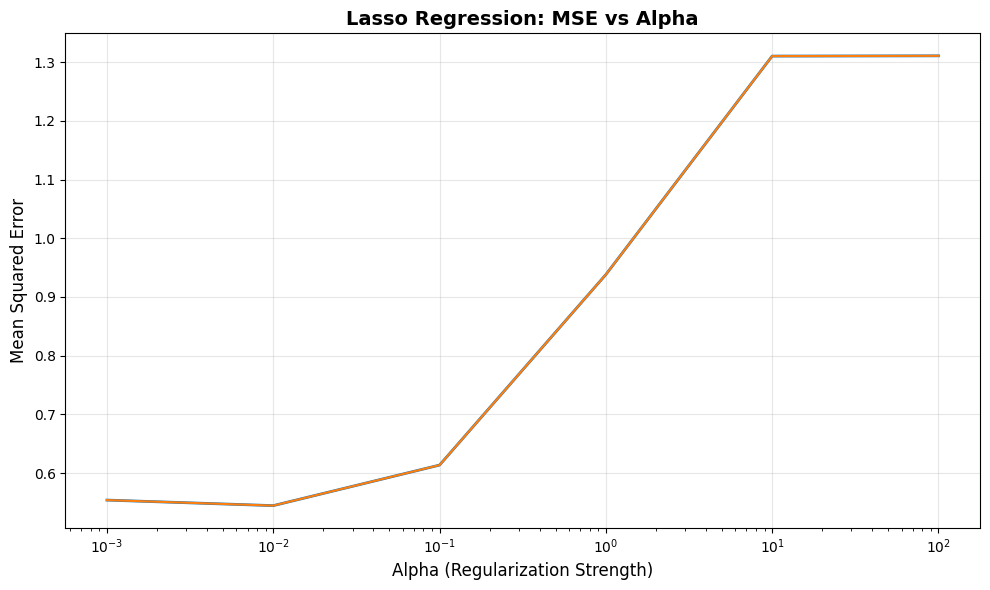

In [21]:
alphas = [0.001, 0.01 , 0.1, 1, 10, 100]
mses = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lasso)
    mses.append(mse)

plt.figure(figsize=(10, 6))
sns.lineplot(x=alphas, y=mses, markers="o", linewidth=2, markersize=8)
plt.xlabel("Alpha (Regularization Strength)", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.title("Lasso Regression: MSE vs Alpha", fontsize=14, fontweight='bold')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()

sns.lineplot(x=alphas, y=mses , markers="o")


**Using LassoCV** (Recommended)

It's much more efficient to use `LassoCV` from scikit-learn, which performs cross-validation to automatically find the optimal $\lambda$:

In [27]:
from sklearn.linear_model import LassoCV

a = [0.001, 0.01 , 0.1, 1, 10, 100]

lasso_cv = LassoCV(alphas=a, cv=5 , random_state=42 , max_iter=1000 , n_jobs=-1)
lasso_cv.fit(X_train, y_train)

print("Optimal alpha:", lasso_cv.alpha_)

y_pred = lasso_cv.predict(X_test)
print("LassoCV MSE:", mean_squared_error(y_test, y_pred))
print("LassoCV R2 Score:", r2_score(y_test, y_pred))

Optimal alpha: 0.001
LassoCV MSE: 0.5538940157172418
LassoCV R2 Score: 0.5773121026225017


RidgeCV does the same for Ridge regression, and `ElasticNetCV` does it for Elastic Net. These classes save time and computational resources while providing robust estimates of the best regularization parameter.

### **Can also use SGDRegressor**

Stochastic Gradient Descent (SGD) can be used to fit a Lasso model by setting the `penalty` parameter to `'l1'`. This is particularly useful for large datasets where coordinate descent may be computationally expensive. However, it requires careful tuning of the learning rate and number of iterations to ensure convergence.

- we can also use `SGDRegressor` for Ridge regression by setting `penalty='l2'` and for Elastic Net by setting `penalty='elasticnet'` and adjusting the `l1_ratio` parameter.

---

## Key Understandings

**1. What Lasso does**
Adds a penalty ($\lambda \times \text{sum of absolute coefficients}$) to the loss. This forces the model to keep coefficients small **and** can eliminate them entirely, performing built-in feature selection.

**2. Coefficients can reach exactly zero**
Unlike Ridge, Lasso can drive coefficients to exactly zero — effectively removing features from the model. This makes Lasso ideal when you suspect many features are irrelevant.

**3. L1 vs L2 penalty behavior**
The absolute value penalty has a **constant gradient** (unlike $b^2$ which has a shrinking gradient near zero). This constant pull is strong enough to push small coefficients all the way to zero.

**4. Lambda controls sparsity**
- $\lambda = 0$ — plain linear regression, no feature selection
- $\lambda$ too large — all coefficients become zero (null model)
- Optimal $\lambda$ — found via cross-validation (`LassoCV`)

**5. Bias-Variance tradeoff**
As $\lambda$ increases: variance drops (less overfitting) and fewer features are used (sparser model), but bias rises. The goal is to find the sparsest model that still generalizes well.

**6. No closed-form solution**
Because $|b|$ is not differentiable at zero, Lasso cannot be solved analytically like Ridge. It uses iterative algorithms such as **Coordinate Descent**.

**7. Geometric view**
OLS finds the unconstrained minimum. Lasso constrains coefficients to stay inside a **diamond (L1 ball)**. The solution is where the OLS error ellipses just touch the diamond — and because the diamond has sharp corners on the axes, coefficients frequently land exactly at zero.

**8. When to use Lasso**
Use Lasso when you have many features and suspect that only a subset are truly relevant. It automatically performs feature selection and produces interpretable, sparse models.